In [ ]:
## Author: Durbanova Anna
## Date: 24.11.2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
## As data is fine, it does not have any missing values, 
## we can start dividing the data into dependent and independent features

# 1. Age and Insurance Cost

In [61]:
x=data.iloc[:,0].values
y=data.iloc[:, -1].values
print(x) ## Age

[19 18 28 ... 18 21 61]


In [62]:
print(y) #Insurance cost

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [65]:
len(x_train) ## 80% of the data is going to the train set

1070

In [66]:
len(x_test) ## 20% of the data is going to the test set

268

In [67]:
len(y_train)

1070

In [68]:
len(y_test)

268

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## Linear Regression Model

In [70]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [72]:
from sklearn.linear_model import LinearRegression

In [74]:
regressor=LinearRegression()

In [75]:
regressor.fit(x_train, y_train)

LinearRegression()

In [76]:
y_pred=regressor.predict(x_test)

## Visualising the Training set results

Text(0, 0.5, 'Insurance Cost')

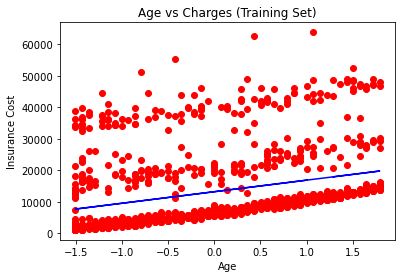

In [77]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue") ## Predicted Cost
plt.title("Age vs Charges (Training Set)")
plt.xlabel("Age")
plt.ylabel("Insurance Cost")

Text(0, 0.5, 'Insurance Cost')

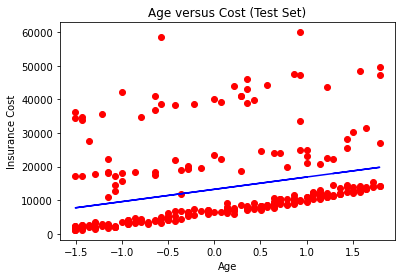

In [78]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.title("Age versus Cost (Test Set)")
plt.xlabel("Age")
plt.ylabel("Insurance Cost")

## Observation:
Well, the correlation between age and cost is not so huge, 
and we can see from the graphs, that it kinda predicted what is the majority is paying

Cost is between 9000 and 15000 dollars

And we see that getting older, the insurance cost is getting higher and higher


# 2. Sex and Insurance Cost

In [79]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
x=data.iloc[:, 1].values
y=data.iloc[:, -1].values


### Encode "female" and "male" into 0 and 1

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=le.fit_transform(x)
x



array([0, 1, 1, ..., 0, 0, 0])

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [14]:
len(x_train)

1070

In [15]:
len(x_test)

268

## Creating a  Regressor for Linear Regression

In [22]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred=regressor.predict(x_test)

## Visualising the Training set results## 

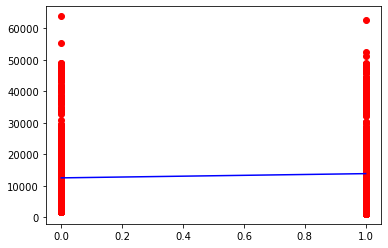

In [26]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")

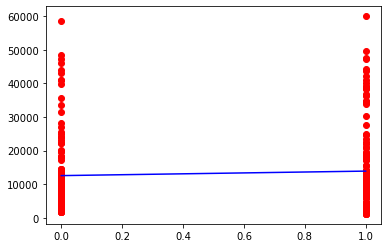

In [27]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")

## Observations
- It seems like there is a slight difference between gender and cost. Men pay more for insurance cost

# 3. BMI & Insurance Cost

In [82]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
x=data.iloc[:, 2].values
y=data.iloc[:,-1].values

## Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Regressor

In [89]:
from sklearn.linear_model import LinearRegression

In [86]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [90]:
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [91]:
y_pred=regressor.predict(x_test)

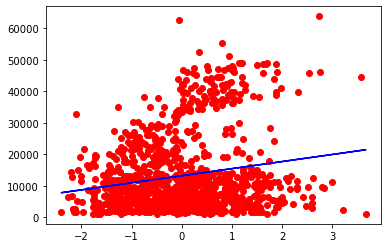

In [92]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")


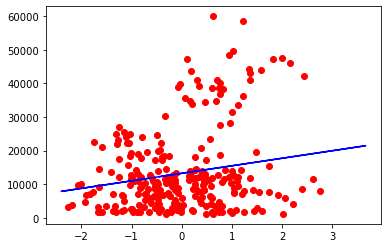

In [93]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")


## Observations: 
People with higher BMI pay more the insurance cost

# 4. Children & Insurance Cost

In [25]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
x=data.iloc[:,3].values
y=data.iloc[:,-1].values


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [37]:
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

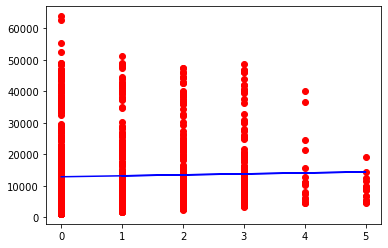

In [39]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")

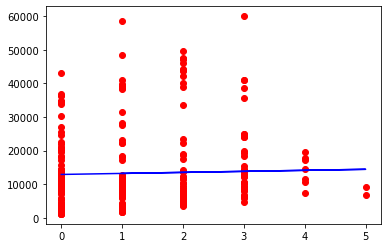

In [40]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")

## Observations

The amount of children does not really influence the insurance cost

# 5. Smoking and Insurance Cost

In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
x=data.iloc[:, 4].values
y=data.iloc[:, -1].values


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=le.fit_transform(x)
x


array([1, 0, 0, ..., 0, 0, 1])

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [54]:
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

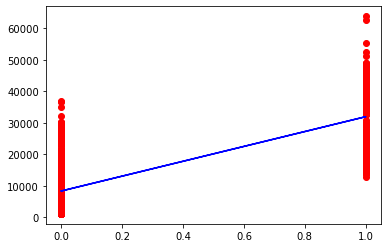

In [55]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")

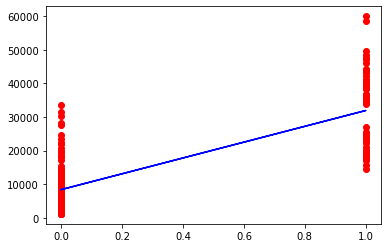

In [56]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")

## Observations:
Here is for sure we can see that those who smoke - pay higher insurance cost
